In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [73]:
data = pd.read_csv('beer-servings.csv')
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [74]:
data=data.iloc[:,1:]

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.2+ KB


# Data cleaning/preprocessing

In [76]:
data.duplicated().sum()

np.int64(0)

In [77]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

### splitting numerical and categorical data

In [78]:
num_df = data.select_dtypes(include='number')
cat_df=data.select_dtypes(include='object')

### check histogram of numerical features for data imputation

['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


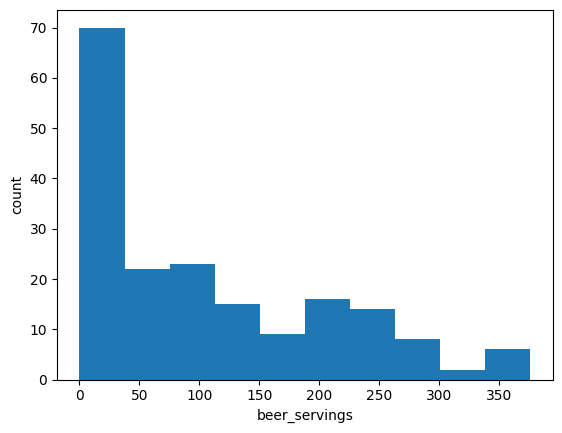

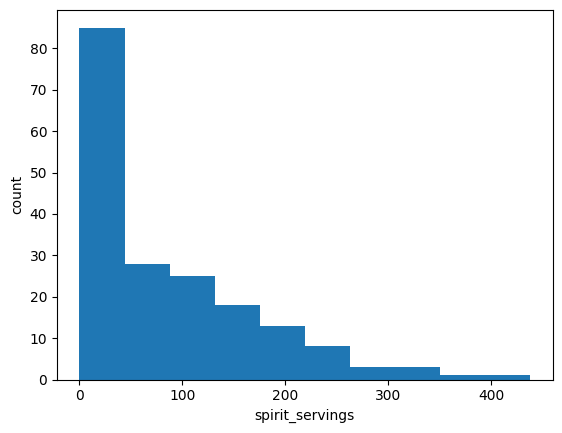

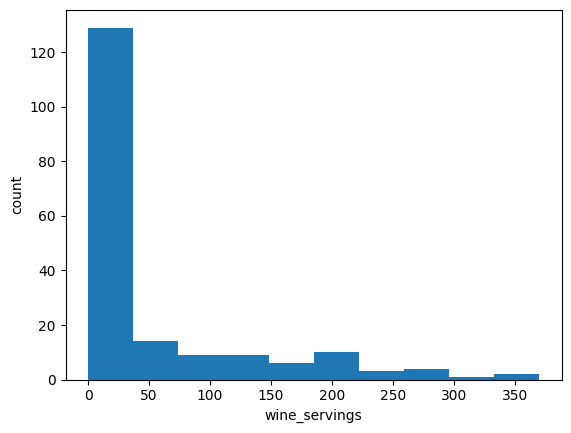

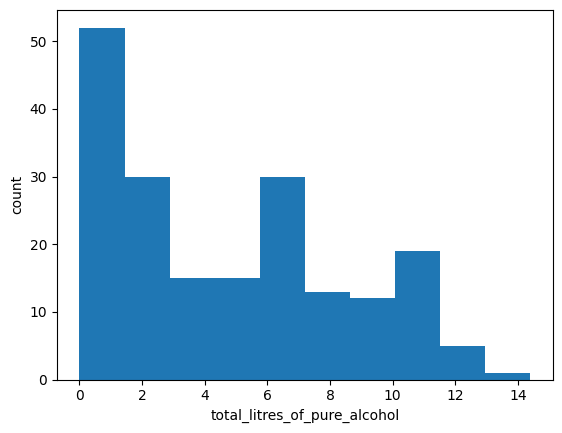

In [79]:
num_cols= num_df.columns.to_list()
print(num_cols)
for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [80]:
for col in num_cols:
    num_df[col]=num_df[col].fillna(num_df[col].median())

In [81]:
num_df.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

### Outlier Handling

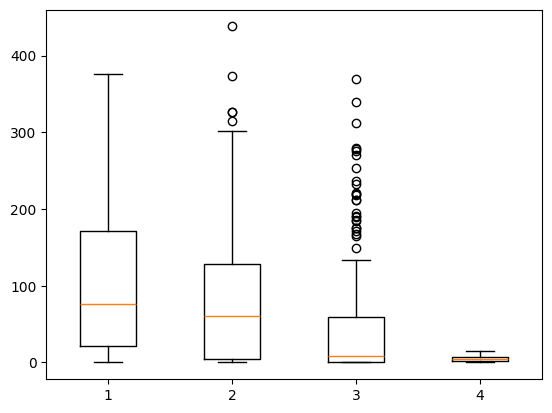

In [82]:
plt.boxplot(num_df)
plt.show()

In [83]:
def replace_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5 * iqr
    lower_bound= q1 -1.5 *iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [84]:
for col in num_cols:
    num_df[col]= replace_outliers(num_df,col)

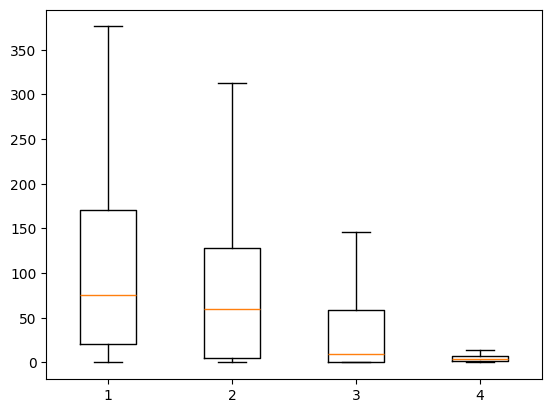

In [85]:
plt.boxplot(num_df)
plt.show()

# Data Normalization
* min-max scaling
* standard scaling

In [86]:
#min max scaling
for col in num_cols[:-1]:
    num_df[col]=(num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())
num_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.000000,0.0000,0.000000,0.0
1,0.236702,0.4224,0.369863,4.9
2,0.066489,0.0000,0.095890,0.7
3,0.651596,0.4416,1.000000,12.4
4,0.577128,0.1824,0.308219,5.9
...,...,...,...,...
188,0.202128,0.3200,0.020548,7.7
189,0.295213,0.0064,0.006849,2.0
190,0.015957,0.0000,0.000000,0.1
191,0.085106,0.0608,0.027397,2.5


In [87]:
#standard scaling
for col in num_cols[:-1]:
    num_df[col]=(num_df[col]-num_df[col].mean())/num_df[col].std()
num_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,-1.054138,-0.968747,-0.721260,0.0
1,-0.151320,0.607180,0.301735,4.9
2,-0.800537,-0.968747,-0.456039,0.7
3,1.431149,0.678813,2.044616,12.4
4,1.147116,-0.288233,0.131236,5.9
...,...,...,...,...
188,-0.283192,0.225137,-0.664427,7.7
189,0.071849,-0.944869,-0.702315,2.0
190,-0.993274,-0.968747,-0.721260,0.1
191,-0.729529,-0.741909,-0.645482,2.5


## scaling with library

In [88]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
num_df=min_max_scaler.fit_transform(num_df)
num_df

array([[0.        , 0.        , 0.        , 0.        ],
       [0.23670213, 0.4224    , 0.36986301, 0.34027778],
       [0.06648936, 0.        , 0.09589041, 0.04861111],
       [0.65159574, 0.4416    , 1.        , 0.86111111],
       [0.57712766, 0.1824    , 0.30821918, 0.40972222],
       [0.2712766 , 0.4096    , 0.30821918, 0.34027778],
       [0.20212766, 0.08      , 1.        , 0.57638889],
       [0.05585106, 0.5728    , 0.07534247, 0.26388889],
       [0.69414894, 0.2304    , 1.        , 0.72222222],
       [0.74202128, 0.24      , 1.        , 0.67361111],
       [0.05585106, 0.1472    , 0.03424658, 0.09027778],
       [0.32446809, 0.5632    , 0.34931507, 0.4375    ],
       [0.11170213, 0.2016    , 0.04794521, 0.13888889],
       [0.20212766, 0.192     , 0.06164384, 0.29513889],
       [0.38031915, 0.5536    , 0.24657534, 0.4375    ],
       [0.37765957, 1.        , 0.28767123, 1.        ],
       [0.78457447, 0.2688    , 1.        , 0.72916667],
       [0.69946809, 0.3648    ,

In [89]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
num_df=std_scaler.fit_transform(num_df)
num_df

array([[-1.05687979e+00, -9.71266575e-01, -7.23135524e-01,
        -1.26435580e+00],
       [-1.51713050e-01,  6.08758792e-01,  3.02520223e-01,
         4.29216068e-02],
       [-8.02619473e-01, -9.71266575e-01, -4.57224775e-01,
        -1.07760189e+00],
       [ 1.43487136e+00,  6.80578127e-01,  2.04993372e+00,
         2.04385641e+00],
       [ 1.15009980e+00, -2.88982894e-01,  1.31577599e-01,
         3.09712915e-01],
       [-1.94976827e-02,  5.60879235e-01,  1.31577599e-01,
         4.29216068e-02],
       [-2.83928417e-01, -6.72019346e-01,  2.04993372e+00,
         9.50012053e-01],
       [-8.43301125e-01,  1.17134358e+00, -5.14205650e-01,
        -2.50548832e-01],
       [ 1.59759796e+00, -1.09434556e-01,  2.04993372e+00,
         1.51027380e+00],
       [ 1.78066539e+00, -7.35248890e-02,  2.04993372e+00,
         1.32351988e+00],
       [-8.43301125e-01, -4.20651674e-01, -6.28167399e-01,
        -9.17527101e-01],
       [ 1.83910575e-01,  1.13543391e+00,  2.45539348e-01,
      

In [90]:
import pickle

with open('min_max_scaler.pkl','wb') as f:
    pickle.dump(min_max_scaler,f)

In [91]:
with open('min_max_scaler.pkl','rb') as f:
    min_max_scaler=pickle.load(f)

In [92]:
test_input=np.array([[200,100,300,400]])

test_output= min_max_scaler.transform(test_input)
test_output

f:\aiml2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[ 52.71262311,  27.06293269, 108.72551117,  27.77777778]])

{'whiskers': [<matplotlib.lines.Line2D at 0x204a148bc50>,
 'caps': [<matplotlib.lines.Line2D at 0x204a148b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204a148bd90>,
 'medians': [<matplotlib.lines.Line2D at 0x2049ae23250>,
 'fliers': [<matplotlib.lines.Line2D at 0x2049ae22490>,
 'means': []}

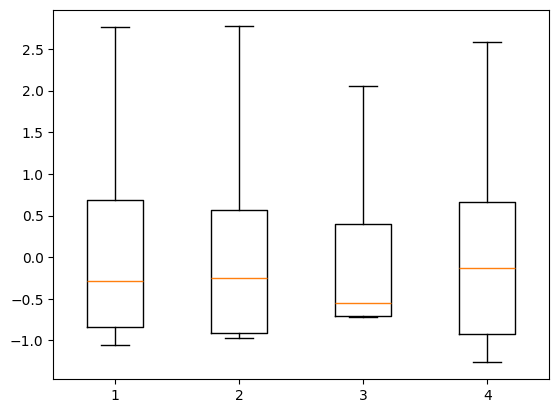

In [93]:
plt.boxplot(num_df)

# Encoding of categorical variables

### one hot encoding

In [94]:
data={'color':['yellow','green','blue','yellow','green']}
df=pd.DataFrame(data)

In [95]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(df[['color']])
encoded_df=pd.DataFrame(encoded_data,columns=['blue','green','yellow'])
final_df=pd.concat([df,encoded_df],axis=1)
final_df

,color,blue,green,yellow
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


In [96]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['color_encoded']=encoder.fit_transform(df['color'])
df

,color,color_encoded
0,yellow,2
1,green,1
2,blue,0
3,yellow,2
4,green,1


In [97]:
cat_cols=cat_df.columns.to_list()
cat_cols
for col in cat_cols:
    encoder=LabelEncoder()
    cat_df[col]=encoder.fit_transform(cat_df[col])
cat_df
num_df

array([[-1.05687979e+00, -9.71266575e-01, -7.23135524e-01,
        -1.26435580e+00],
       [-1.51713050e-01,  6.08758792e-01,  3.02520223e-01,
         4.29216068e-02],
       [-8.02619473e-01, -9.71266575e-01, -4.57224775e-01,
        -1.07760189e+00],
       [ 1.43487136e+00,  6.80578127e-01,  2.04993372e+00,
         2.04385641e+00],
       [ 1.15009980e+00, -2.88982894e-01,  1.31577599e-01,
         3.09712915e-01],
       [-1.94976827e-02,  5.60879235e-01,  1.31577599e-01,
         4.29216068e-02],
       [-2.83928417e-01, -6.72019346e-01,  2.04993372e+00,
         9.50012053e-01],
       [-8.43301125e-01,  1.17134358e+00, -5.14205650e-01,
        -2.50548832e-01],
       [ 1.59759796e+00, -1.09434556e-01,  2.04993372e+00,
         1.51027380e+00],
       [ 1.78066539e+00, -7.35248890e-02,  2.04993372e+00,
         1.32351988e+00],
       [-8.43301125e-01, -4.20651674e-01, -6.28167399e-01,
        -9.17527101e-01],
       [ 1.83910575e-01,  1.13543391e+00,  2.45539348e-01,
      

In [98]:
import pickle
with open('label_encoder.pkl','wb') as f:
    pickle.dump(encoder,f)

In [99]:
with open('label_encoder.pkl','rb') as f:
    encoder=pickle.load(f)

In [100]:
num_df = pd.DataFrame(num_df, columns=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'])  

final_df=pd.concat([num_df,cat_df],axis=1)
final_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,-1.056880,-0.971267,-0.723136,-1.264356,0,1
1,-0.151713,0.608759,0.302520,0.042922,1,2
2,-0.802619,-0.971267,-0.457225,-1.077602,2,0
3,1.434871,0.680578,2.049934,2.043856,3,2
4,1.150100,-0.288983,0.131578,0.309713,4,0
...,...,...,...,...,...,...
188,-0.283928,0.225722,-0.666155,0.789937,188,5
189,0.072036,-0.947327,-0.704142,-0.730773,189,1
190,-0.995857,-0.971267,-0.723136,-1.237677,190,1
191,-0.731427,-0.743839,-0.647161,-0.597378,191,0


## separate feaures and labels

In [101]:
y=final_df['total_litres_of_pure_alcohol']
x=final_df.drop('total_litres_of_pure_alcohol',axis=1)
y.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: total_litres_of_pure_alcohol, Length: 193, dtype: bool

## train-test_split

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


# data preprocessing steps



* Dropping duplicate rows
* Finding and handling duplicate columns
* Inspecting column data type
* Spliting numerical and categorical variables
* Checking and Filling missing values
* Filling Numerical
* Inspcting with EDA
* Filling Categorical
* Handling Class imbalance
* Outlier detection and removal
* Scaling numerical columns
* Encoding categorical columns
* Pickle Scalers and Encoders
* Separating features and labels
* Train-test split

In [130]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

data=pd.read_csv('beer-servings.csv')

mod=LinearRegression()

mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error,r2_score
a=mean_squared_error(y_test,y_pred)
a
b=r2_score(y_pred,y_test)
print(f"MSE-->{a},R2-score-->{b}")

MSE-->0.08579837802759303,R2-score-->0.8774240242855083


In [122]:
mod.coef_

array([ 4.47222995e-01,  3.65642063e-01,  3.55100213e-01,  2.96997521e-04,
       -4.95914334e-02])

In [124]:
final_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,-1.056880,-0.971267,-0.723136,-1.264356,0,1
1,-0.151713,0.608759,0.302520,0.042922,1,2
2,-0.802619,-0.971267,-0.457225,-1.077602,2,0
3,1.434871,0.680578,2.049934,2.043856,3,2
4,1.150100,-0.288983,0.131578,0.309713,4,0
...,...,...,...,...,...,...
188,-0.283928,0.225722,-0.666155,0.789937,188,5
189,0.072036,-0.947327,-0.704142,-0.730773,189,1
190,-0.995857,-0.971267,-0.723136,-1.237677,190,1
191,-0.731427,-0.743839,-0.647161,-0.597378,191,0


In [139]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly.fit_transform(X_train)

mod.fit(X_poly,y_train)
x_test_poly=poly.fit_transform(X_test)
y_pred=mod.predict(x_test_poly)
c=mean_squared_error(y_pred,y_test)
d=r2_score(y_pred,y_test)

In [148]:
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

data=pd.read_csv('beer-servings.csv')

mod=Ridge()

mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
e=mean_squared_error(y_test,y_pred)

f=r2_score(y_pred,y_test)
print(f"MSE-->{e},R2-score-->{f}")

MSE-->0.08554840175335351,R2-score-->0.8768874129018283


In [152]:
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

data=pd.read_csv('beer-servings.csv')

mod=Lasso()

mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)

In [153]:
from sklearn.metrics import mean_squared_error,r2_score
g=mean_squared_error(y_test,y_pred)

h=r2_score(y_pred,y_test)
print(f"MSE-->{g},R2-score-->{h}")

MSE-->0.828926467222201,R2-score-->-1469.6731018415958


In [154]:
from sklearn.linear_model import ElasticNet
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

data=pd.read_csv('beer-servings.csv')

mod=ElasticNet()

mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)

In [155]:
from sklearn.metrics import mean_squared_error,r2_score
i=mean_squared_error(y_test,y_pred)

j=r2_score(y_pred,y_test)
print(f"MSE-->{i},R2-score-->{j}")

MSE-->0.47327570102379113,R2-score-->-6.614656868005028


In [156]:
result_df=pd.DataFrame(columns=['model','metric','value'])
result_df.loc[len(result_df)]=['linear regression','MSE',a]
result_df.loc[len(result_df)]=['linear regression','R2',b]
result_df.loc[len(result_df)]=['polynomial regression','MSE',c]
result_df.loc[len(result_df)]=['polynomial regression','R2',d]
result_df.loc[len(result_df)]=['ridge regression','MSE',e]
result_df.loc[len(result_df)]=['ridge regression','R2',f]
result_df.loc[len(result_df)]=['lasso regression','MSE',g]
result_df.loc[len(result_df)]=['Lasso regression','R2',h]
result_df.loc[len(result_df)]=['Elasticnet regression','MSE',i]
result_df.loc[len(result_df)]=['Elasticnet regression','R2',j]
result_df

,model,metric,value
0,linear regression,MSE,0.085548
1,linear regression,R2,0.876887
2,polynomial regression,MSE,0.667890
3,polynomial regression,R2,0.524812
4,ridge regression,MSE,0.085548
5,ridge regression,R2,0.876887
6,lasso regression,MSE,0.828926
7,Lasso regression,R2,-1469.673102
8,Elasticnet regression,MSE,0.473276
9,Elasticnet regression,R2,-6.614657
